In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits
from __future__ import division
import numpy as np

# load data
digits = load_digits()

# copied from notebook 02_sklearn_data.ipynb
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary)
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

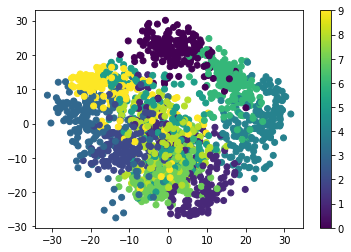

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver="randomized")
proj = pca.fit_transform(digits.data)

data = proj
a = np.ones(1797).reshape(-1,1)
data = np.hstack((data,a))
label = digits.target
plt.scatter(data[:,0], data[:,1], c=label)
plt.colorbar()

In [5]:
class LR():
    
    def __init__(self, data, true_label):
        self.data = data
        self.true_label = true_label
        self.index_n = []
        for i in range(10):
            self.index_n.append(np.where(self.true_label == i)[0])
        
    def sigmod(self, x):
        sigmod = 1/(1+np.exp(-x))
        return sigmod
        
    def output(self):
        self.net = np.dot(self.data, self.w)
        self.A = self.sigmod(self.net)
    def predict(self, w):
        self.w = w
        self.output()
        self.pred = []
        for i in range(len(self.A)):
            self.pred.append(np.argmax(self.A[i]))
        return self.pred
    
    def score(self):
        score = 0
        self.f_index = []
        for i in range(len(self.pred)):
            if self.pred[i] == self.true_label[i]:
                score += 1
            else:
                self.f_index.append(i)
        score /= len(self.pred)
        return score
        
    def performance(self):
        L = 0
        all_i = [i for i in range(len(self.A))]
        L = np.sum(np.log(self.A[all_i,self.true_label]))
        return L
    
    def gradient(self):
        grad_w = np.zeros((3,10))
        for i in range(10):
            grad_w[:,i] = np.sum((1-self.A[self.index_n[i], i].reshape(-1,1))*self.data[self.index_n[i]], axis = 0)
        return grad_w

0        0.10239287701725097         -133988.11695584538
1        0.10294936004451864         -133725.38820660074
2        0.10350584307178631         -133462.98765470588
3        0.10461880912632164         -133200.8513274456
4        0.10573177518085698         -132938.92120021282
5        0.10684474123539232         -132677.15264030235
6        0.10962715637173066         -132415.51648158708
7        0.11185308848080133         -132153.99736177622
8        0.11296605453533667         -131892.5913154693
9        0.11407902058987202         -131631.30443185836
10        0.11630495269894268         -131370.153196504
11        0.11908736783528102         -131109.16649528054
12        0.12075681691708402         -130848.38865412795
13        0.12242626599888703         -130587.88163082115
14        0.12520868113522537         -130327.72240023178
15        0.12910406232609906         -130067.99069762074
16        0.1318864774624374         -129808.74738155497
17        0.13633834168057873

173        0.2576516416249304         -92312.3184697248
174        0.2576516416249304         -92091.35584414248
175        0.2576516416249304         -91870.56629613655
176        0.2576516416249304         -91649.94819342848
177        0.2582081246521981         -91429.50266097282
178        0.2587646076794658         -91209.23381928049
179        0.2587646076794658         -90989.14942692334
180        0.2587646076794658         -90769.26180815048
181        0.2593210907067334         -90549.58868320833
182        0.2593210907067334         -90330.15320242042
183        0.2593210907067334         -90110.98231957277
184        0.2593210907067334         -89892.10301513285
185        0.2598775737340011         -89673.5370420677
186        0.2598775737340011         -89455.29622037253
187        0.2604340567612688         -89237.38044229984
188        0.2604340567612688         -89019.77893469142
189        0.2598775737340011         -88802.4734445079
190        0.2604340567612688     

342        0.2671118530884808         -59373.792966221976
343        0.2671118530884808         -59212.76056059112
344        0.2671118530884808         -59052.44858054738
345        0.2671118530884808         -58892.81450199647
346        0.2671118530884808         -58733.80495295797
347        0.2671118530884808         -58575.36486954201
348        0.2671118530884808         -58417.444349472455
349        0.2671118530884808         -58260.002546452226
350        0.2671118530884808         -58103.00928688803
351        0.2671118530884808         -57946.44521777777
352        0.2671118530884808         -57790.30096935155
353        0.2671118530884808         -57634.57560566183
354        0.2671118530884808         -57479.27465352321
355        0.2671118530884808         -57324.40807529964
356        0.2671118530884808         -57169.98848154645
357        0.2671118530884808         -57016.02965325989
358        0.2671118530884808         -56862.54526198569
359        0.267111853088480

487        0.2676683361157485         -40795.5229440965
488        0.26655537006121316         -40692.652749841815
489        0.26655537006121316         -40590.08212671691
490        0.26655537006121316         -40487.84119562276
491        0.2659988870339455         -40385.95861737028
492        0.2671118530884808         -40284.454878477154
493        0.26655537006121316         -40183.336688318894
494        0.26655537006121316         -40082.596387658115
495        0.26655537006121316         -39982.21674508741
496        0.2654424040066778         -39882.17742697876
497        0.2654424040066778         -39782.45947399903
498        0.2654424040066778         -39683.04698120622
499        0.2659988870339455         -39583.927093056336
500        0.2659988870339455         -39485.0894803009
501        0.2659988870339455         -39386.52580842816
502        0.2659988870339455         -39288.22924516276
503        0.2671118530884808         -39190.19394869964
504        0.266555370

663        0.3082915971062883         -28013.350417211615
664        0.3082915971062883         -27968.11666134037
665        0.3082915971062883         -27923.11228680689
666        0.3082915971062883         -27878.343665514825
667        0.3082915971062883         -27833.817104083686
668        0.3082915971062883         -27789.53789158043
669        0.3071786310517529         -27745.509492584177
670        0.3071786310517529         -27701.733034011646
671        0.3077351140790206         -27658.20718628553
672        0.3077351140790206         -27614.928465041747
673        0.3077351140790206         -27571.891895606917
674        0.3077351140790206         -27529.091910257062
675        0.3082915971062883         -27486.523308657335
676        0.3082915971062883         -27444.182115552918
677        0.3082915971062883         -27402.066209503704
678        0.3082915971062883         -27360.175651761274
679        0.3082915971062883         -27318.512696522717
680        0.30829

839        0.3071786310517529         -22652.946703817626
840        0.3071786310517529         -22630.13448279439
841        0.3071786310517529         -22607.370750135433
842        0.3071786310517529         -22584.655376644394
843        0.3071786310517529         -22561.988221639218
844        0.3071786310517529         -22539.369127318783
845        0.3071786310517529         -22516.797914182644
846        0.3071786310517529         -22494.274377382128
847        0.3071786310517529         -22471.79828386088
848        0.3071786310517529         -22449.369370144777
849        0.3071786310517529         -22426.987340660817
850        0.3071786310517529         -22404.651866497232
851        0.3071786310517529         -22382.362584555583
852        0.3071786310517529         -22360.11909708391
853        0.3071786310517529         -22337.920971611733
854        0.3071786310517529         -22315.767741329488
855        0.3071786310517529         -22293.658905963137
856        0.3071

982        0.3082915971062883         -19730.321219375255
983        0.3082915971062883         -19711.520538444605
984        0.3082915971062883         -19692.732042604533
985        0.3082915971062883         -19673.955549132363
986        0.3082915971062883         -19655.190876607874
987        0.3082915971062883         -19636.437845018543
988        0.3082915971062883         -19617.696275876664
989        0.3082915971062883         -19598.96599234684
990        0.3082915971062883         -19580.246819382402
991        0.3082915971062883         -19561.538583869427
992        0.3082915971062883         -19542.841114777133
993        0.3082915971062883         -19524.154243313504
994        0.3082915971062883         -19505.477803085305
995        0.3082915971062883         -19486.811630261487
996        0.3082915971062883         -19468.155563739158
997        0.3082915971062883         -19449.50944531149
998        0.3082915971062883         -19430.873119836855
999        0.308

1125        0.3094045631608236         -17135.493182994513
1126        0.3094045631608236         -17117.9983748038
1127        0.3094045631608236         -17100.512339524037
1128        0.3094045631608236         -17083.035143393146
1129        0.3094045631608236         -17065.566854872894
1130        0.3094045631608236         -17048.107544484246
1131        0.3094045631608236         -17030.65728463209
1132        0.3094045631608236         -17013.216149418688
1133        0.3094045631608236         -16995.784214445775
1134        0.3094045631608236         -16978.361556605327
1135        0.3094045631608236         -16960.94825385967
1136        0.3094045631608236         -16943.54438501195
1137        0.3094045631608236         -16926.150029468525
1138        0.3088480801335559         -16908.765266995375
1139        0.3088480801335559         -16891.390177471156
1140        0.3088480801335559         -16874.02484063999
1141        0.3088480801335559         -16856.669335867482
114

1267        0.3099610461880913         -14755.040324884143
1268        0.3099610461880913         -14738.978499295188
1269        0.3099610461880913         -14722.925600482853
1270        0.3099610461880913         -14706.881567807966
1271        0.3099610461880913         -14690.84633663276
1272        0.3099610461880913         -14674.819838618088
1273        0.3099610461880913         -14658.802002038414
1274        0.3099610461880913         -14642.792752109503
1275        0.3099610461880913         -14626.792011324074
1276        0.3099610461880913         -14610.799699791012
1277        0.3099610461880913         -14594.815735574155
1278        0.3099610461880913         -14578.840035027151
1279        0.3099610461880913         -14562.872513121392
1280        0.3099610461880913         -14546.913083764517
1281        0.3099610461880913         -14530.961660107456
1282        0.3099610461880913         -14515.01815483849
1283        0.3099610461880913         -14499.082480463218

1408        0.3099610461880913         -12563.014442223977
1409        0.3099610461880913         -12548.06855454263
1410        0.3099610461880913         -12533.133703134808
1411        0.3099610461880913         -12518.210030416129
1412        0.3099610461880913         -12503.297682098142
1413        0.3099610461880913         -12488.396806643472
1414        0.3099610461880913         -12473.507554690586
1415        0.3099610461880913         -12458.630078452545
1416        0.3099610461880913         -12443.764531094675
1417        0.3099610461880913         -12428.911066096876
1418        0.3099610461880913         -12414.06983660673
1419        0.3099610461880913         -12399.24099479011
1420        0.3099610461880913         -12384.424691186214
1421        0.3099610461880913         -12369.621074074004
1422        0.3099610461880913         -12354.830288857032
1423        0.3099610461880913         -12340.052477473087
1424        0.3099610461880913         -12325.287777834643


1550        0.3099610461880913         -10568.663173876372
1551        0.3099610461880913         -10555.482967449174
1552        0.3099610461880913         -10542.315920827888
1553        0.3099610461880913         -10529.16210302536
1554        0.3099610461880913         -10516.021581942581
1555        0.3099610461880913         -10502.894424257724
1556        0.3099610461880913         -10489.780695337808
1557        0.3099610461880913         -10476.680459175874
1558        0.3099610461880913         -10463.593778356093
1559        0.3099610461880913         -10450.520714048771
1560        0.3099610461880913         -10437.461326036646
1561        0.3099610461880913         -10424.415672773206
1562        0.3099610461880913         -10411.383811473097
1563        0.3099610461880913         -10398.365798234034
1564        0.3099610461880913         -10385.361688188976
1565        0.3099610461880913         -10372.371535686754
1566        0.3099610461880913         -10359.39539449891

1724        0.3099610461880913         -8531.055047712794
1725        0.3099610461880913         -8520.972748077678
1726        0.3099610461880913         -8510.910846669443
1727        0.3099610461880913         -8500.869386260481
1728        0.3099610461880913         -8490.848413805648
1729        0.3099610461880913         -8480.8479805907
1730        0.3099610461880913         -8470.86814231348
1731        0.3099610461880913         -8460.908959096534
1732        0.3099610461880913         -8450.970495430494
1733        0.3099610461880913         -8441.052820048128
1734        0.3099610461880913         -8431.156005729534
1735        0.3099610461880913         -8421.280129039515
1736        0.3099610461880913         -8411.425269998495
1737        0.3099610461880913         -8401.591511688914
1738        0.3099610461880913         -8391.778939799207
1739        0.3099610461880913         -8381.987642107957
1740        0.3099610461880913         -8372.217707910939
1741        0.309

1891        0.3094045631608236         -7098.3417065339
1892        0.3094045631608236         -7090.965516702789
1893        0.3094045631608236         -7083.603555285738
1894        0.3094045631608236         -7076.255905945218
1895        0.3094045631608236         -7068.92264785891
1896        0.3094045631608236         -7061.603855114692
1897        0.3094045631608236         -7054.29959617238
1898        0.3094045631608236         -7047.009933399625
1899        0.3094045631608236         -7039.734922687642
1900        0.3094045631608236         -7032.4746131506045
1901        0.3094045631608236         -7025.229046910643
1902        0.3094045631608236         -7017.998258968463
1903        0.3094045631608236         -7010.782277157763
1904        0.3094045631608236         -7003.5811221798685
1905        0.3094045631608236         -6996.394807713534
1906        0.3094045631608236         -6989.223340593516
1907        0.3094045631608236         -6982.0667210504635
1908        0.3

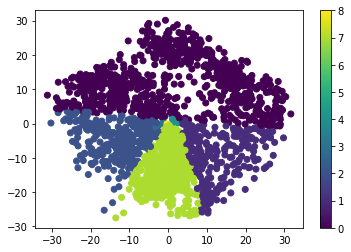

In [17]:
w = np.arange(30.0).reshape(3,10)+1
alpha = 0.00001
n = 2000

lr = LR(data, label)
c = 0
for i in range(n):
    c += 1
    pred = lr.predict(w)
    score = lr.score()
    performance = lr.performance()
    print(i, '      ', score, '       ', performance)
    grad = lr.gradient()
    w += alpha*grad
plt.scatter(data[:,0], data[:,1], c=lr.pred)
plt.colorbar()